Tempo utilizado para fazer este Jupyter Notebook: ~5 horas.

# Análise explorátorio das estações do INMET

## Objetivo

Objetivo: Realizar uma análise exploratória das estações referentes as **normais climatológicas do Brasil comparando as estações dos períodos 1981-2010 e 1991-2020** do INMET disponível no link abaixo:

[https://portal.inmet.gov.br/normais](https://portal.inmet.gov.br/normais)

Utilizaram-se os seguintes arquivos:

[1981-2010](https://portal.inmet.gov.br/uploads/normais/Esta%C3%A7%C3%B5es-Normal-Climato%C3%B3gica-1981-2010.xls)

[1991-2020](https://portal.inmet.gov.br/uploads/normais/Normal-Climatologica-ESTA%C3%87%C3%95ES.xlsx)

# Importação das bibliotecas

In [329]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

# Leitura do arquivo

Leitura do arquivo pulando as três primeiras linhas do arquivo 1981-2010 e duas linhas para o arquivo 1991-2020, essas linhas não são importantes.

In [330]:
# Arquivo referente ao período "1981-2010". Este arquivo está no formato '.xls', salvei no próprio Excel para '.xlsx'.
# Neste arquivo há muitas células em branco, eu preenchi como sendo Operante. Fiz tudo no próprio Excel para não ter dor de cabeça.
df2 = pd.read_excel('../dados/texto/Estações-Normal-Climatoógica-1981-2010.xlsx', skiprows = range(0, 3))

# Arquivo referente ao período "1991-2020":
df3 = pd.read_excel('../dados/texto/Normal-Climatologica-ESTAÇÕES.xlsx', skiprows = range(0, 2))

/tmp/ipykernel_254/3755466442.py:6: FutureWarning:

Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])



In [331]:
df2

,Nº,Código,Nome da Estação,UF,Latitude,Longitude,Atitude,Inicio Operação,Fim Operação,Situação
0,1,82704,CRUZEIRO DO SUL,AC,-7.600000,-72.666667,170.00,1928-01-01 00:00:00,2016-02-01 00:00:00,Desativada
1,2,82915,RIO BRANCO,AC,-9.950000,-67.866667,160.00,1929-01-01 00:00:00,,Operante
2,3,82807,TARAUACA,AC,-8.166667,-70.766667,190.00,1966-06-06 00:00:00,,Operante
3,4,82989,AGUA BRANCA,AL,-9.283333,-37.900000,605.34,1928-05-05 00:00:00,,Operante
4,5,82995,ARAPIRACA,AL,-9.733333,-36.766667,247.00,1929-01-01 00:00:00,,Operante
...,...,...,...,...,...,...,...,...,...,...
432,433,83231,PARANA,TO,-12.550000,-47.833333,275.00,1916-01-01 00:00:00,1994-09-19 00:00:00,Desativada
433,434,82863,PEDRO AFONSO,TO,-8.966667,-48.183333,187.00,1977-03-04 00:00:00,,Operante
434,435,83228,PEIXE,TO,-12.016667,-48.350000,242.49,1975-05-01 00:00:00,,Operante
435,436,83064,PORTO NACIONAL,TO,-10.716667,-48.416667,239.20,1915-01-01 00:00:00,,Operante


Essa lista foi feita para considerar todos os estados brasileiros.

In [332]:
NomeEstados = ['AC', 'AL', 'AP', 'AM', 'BA', 
               'CE', 'DF', 'ES', 'GO', 'MA', 
               'MT', 'MS', 'MG', 'PA', 'PB', 
               'PR', 'PE', 'PI', 'RJ', 'RN', 
               'RS', 'RO', 'RR', 'SC', 'SP', 
               'SE', 'TO']

# Transforma em um DataFrame
NomeEstados.sort(reverse=False)
Estados = pd.DataFrame(NomeEstados)
Estados.rename(columns={0: 'UF'}, inplace=True)

# Processamento dos arquivos

In [333]:
df2

,Nº,Código,Nome da Estação,UF,Latitude,Longitude,Atitude,Inicio Operação,Fim Operação,Situação
0,1,82704,CRUZEIRO DO SUL,AC,-7.600000,-72.666667,170.00,1928-01-01 00:00:00,2016-02-01 00:00:00,Desativada
1,2,82915,RIO BRANCO,AC,-9.950000,-67.866667,160.00,1929-01-01 00:00:00,,Operante
2,3,82807,TARAUACA,AC,-8.166667,-70.766667,190.00,1966-06-06 00:00:00,,Operante
3,4,82989,AGUA BRANCA,AL,-9.283333,-37.900000,605.34,1928-05-05 00:00:00,,Operante
4,5,82995,ARAPIRACA,AL,-9.733333,-36.766667,247.00,1929-01-01 00:00:00,,Operante
...,...,...,...,...,...,...,...,...,...,...
432,433,83231,PARANA,TO,-12.550000,-47.833333,275.00,1916-01-01 00:00:00,1994-09-19 00:00:00,Desativada
433,434,82863,PEDRO AFONSO,TO,-8.966667,-48.183333,187.00,1977-03-04 00:00:00,,Operante
434,435,83228,PEIXE,TO,-12.016667,-48.350000,242.49,1975-05-01 00:00:00,,Operante
435,436,83064,PORTO NACIONAL,TO,-10.716667,-48.416667,239.20,1915-01-01 00:00:00,,Operante


In [334]:
df3

,Nº,Código,Nome da Estação,UF,Latitude,Longitude,Atitude,Inicio Operação,Fim Operação,Situação
0,1,82989,AGUA BRANCA,AL,-9.264722,-37.938056,603.42,1928-05-05,NaT,Operante
1,2,83249,ALAGOINHAS,BA,-12.148611,-38.425278,129.78,1931-01-01,2021-07-15,Fechada
2,3,82353,ALTAMIRA,PA,-3.214167,-52.213056,101.51,1927-04-24,2021-07-25,Fechada
3,4,83007,ALTO DA BOA VISTA,RJ,-22.965833,-43.279167,347.10,1966-06-01,NaT,Operante
4,5,82970,ALTO PARNAIBA,MA,-9.108333,-45.948611,285.05,1976-08-21,2021-07-25,Fechada
...,...,...,...,...,...,...,...,...,...,...
266,267,83642,VICOSA,MG,-20.762500,-42.863889,697.53,1919-10-01,2018-03-08,Fechada
267,268,83648,VITORIA,ES,-20.315833,-40.316944,36.20,1923-11-20,NaT,Operante
268,269,83344,VITORIA DA CONQUISTA,BA,-14.886389,-40.801389,879.47,1936-01-01,NaT,Operante
269,270,83623,VOTUPORANGA,SP,-20.439722,-49.983611,510.41,1976-07-05,NaT,Operante


## Seleção de colunas de interesse

In [335]:
df2a = df2[['UF', 'Situação']]  # 1981-2010
df3a = df3[['UF', 'Situação']]  # 1991-2020

## Agregação pela coluna Situação

In [336]:
df2_operante = df2a.loc[df2['Situação'] == 'Operante'].groupby('UF').agg(np.size)
df3_operante = df3a.loc[df3['Situação'] == 'Operante'].groupby('UF').agg(np.size)

df2_fechada = df2a.loc[df2['Situação'] == 'Fechada'].groupby('UF').agg(np.size)
df3_fechada = df3a.loc[df3['Situação'] == 'Fechada'].groupby('UF').agg(np.size)

df2_desativada = df2a.loc[df2['Situação'] == 'Desativada'].groupby('UF').agg(np.size)
df3_desativada = df3a.loc[df3['Situação'] == 'Desativada'].groupby('UF').agg(np.size)

## Une os dois DataFrames de cada situaçao em um só

In [337]:
df_operante = pd.merge(df2_operante, df3_operante, on='UF', how='left')
df_fechada = pd.merge(df2_fechada, df3_fechada, on='UF', how='left')
df_desativada = pd.merge(df2_desativada, df3_desativada, on='UF', how='left')

Reseta o index para se tornar coluna.

In [338]:
df_operante = df_operante.reset_index()
df_fechada = df_fechada.reset_index()
df_desativada = df_desativada.reset_index()

Junta novamente os DataFrames.

In [339]:
operante = pd.merge(Estados, df_operante, on='UF', how='left')
fechada = pd.merge(Estados, df_fechada, on='UF', how='left')
desativada = pd.merge(Estados, df_desativada, on='UF', how='left')

Define a coluna `UF` como index.

In [340]:
operante.set_index('UF', inplace=True)
fechada.set_index('UF', inplace=True)
desativada.set_index('UF', inplace=True)

## Renomeia o nome das colunas

In [341]:
operante.rename(columns={'Situação_x': '1981-2010', 'Situação_y': '1991-2020'}, inplace=True)
fechada.rename(columns={'Situação_x': '1981-2010', 'Situação_y': '1991-2020'}, inplace=True)
desativada.rename(columns={'Situação_x': '1981-2010', 'Situação_y': '1991-2020'}, inplace=True)

## Geração dos gráficos

### Gráfico de barras comparando os dois períodos (1981-2010 e 1991-2020)

In [342]:
# Estações operantes:

import plotly as plty
import cufflinks as cf

plty.offline.init_notebook_mode(connected=True)

cf.go_offline()
cf.set_config_file(sharing='public', theme='white', offline=False, world_readable=True)

operante.iplot(kind="bar", y=['1981-2010', '1991-2020'],
               yTitle="Estado", xTitle="Total de estações", title="Comparação do total de estações OPERANTES em cada estado brasileiro",
               colors=["tomato", "blue"], bargap=0.5,
               sortbars=True,
               dimensions=(1400, 800),
               orientation="h", filename='pyHRM')

In [343]:
# Estações fechadas:

import plotly as plty
import cufflinks as cf

plty.offline.init_notebook_mode(connected=True)

cf.go_offline()
cf.set_config_file(sharing='public', theme='white', offline=False, world_readable=True)

fechada.iplot(kind="bar", y=['1981-2010', '1991-2020'],
              yTitle="Estado", xTitle="Total de estações", title="Comparação do total de estações FECHADAS em cada estado brasileiro",
              colors=["tomato", "blue"], bargap=0.5,
              sortbars=True,
              dimensions=(1400, 800),
              orientation="h")

In [344]:
# Estações desativadas:

import plotly as plty
import cufflinks as cf

plty.offline.init_notebook_mode(connected=True)

cf.go_offline()
#cf.set_config_file(sharing='public', theme='white', offline=False, world_readable=True)
#cf.set_config_file(sharing='public', theme='white', offline=False, world_readable=True)

desativada.iplot(kind="bar", y=['1981-2010', '1991-2020'],
                  yTitle="Estado", xTitle="Total de estações", title="Comparação do total de estações DESATIVADAS em cada estado brasileiro",
                  colors=["tomato", "blue"], bargap=0.5,
                  sortbars=True,
                  dimensions=(1400, 800),
                  orientation="h")

### Gráfico de pizza

In [345]:
total = (operante.sum()+fechada.sum()+desativada.sum())  # 100%

# Cálculo da porcentagem para cada Situação (OPERANTE, FECHADA e DESATIVADA).
pct_operante = (operante.sum()/total).round(4)*100
pct_fechada = (fechada.sum()/total).round(4)*100
pct_desativada = (desativada.sum()/total).round(4)*100

In [346]:
# Transforma em um DataFrame.
pizza = pd.DataFrame([pct_operante, pct_fechada, pct_desativada])
pizza.rename(index={0:'Operante', 1:'Fechada', 2:'Desativada'}, inplace=True)
pizza

,1981-2010,1991-2020
Operante,67.51,75.85
Fechada,2.06,7.63
Desativada,30.43,16.53


In [347]:
cf.set_config_file(sharing='public', theme='white', offline=True)

pizza.iplot(kind="bar", y=['1981-2010', '1991-2020'],
                  yTitle="Situação", xTitle="Porcentagem (%)", title="Comparação da situação percentual das estações",
                  colors=["tomato", "blue"], bargap=0.5,
                  sortbars=True,
                  dimensions=(1400, 400),
                  orientation="h")

# Gráfico espacial

## Objetivo

O objetivo consiste em utilizar os pontos de latitude e longitude do DataFrame do arquivo `xlsx` para desenhar no mapa.

## Instalação das bibliotecas

In [348]:
#!pip install geopandas

## Importação das bibliotecas

In [349]:
import geopandas as gpd
import matplotlib.pyplot as plt

## Seleção de colunas específicas do DataFrame

In [350]:
df2a = df2[['Nº', 'Latitude', 'Longitude', 'Situação']]  # 1981-2010
df3a = df3[['Nº', 'Latitude', 'Longitude', 'Situação']]  # 1991-2020

Visualização das colunas selecionadas.

In [351]:
df2a

,Nº,Latitude,Longitude,Situação
0,1,-7.600000,-72.666667,Desativada
1,2,-9.950000,-67.866667,Operante
2,3,-8.166667,-70.766667,Operante
3,4,-9.283333,-37.900000,Operante
4,5,-9.733333,-36.766667,Operante
...,...,...,...,...
432,433,-12.550000,-47.833333,Desativada
433,434,-8.966667,-48.183333,Operante
434,435,-12.016667,-48.350000,Operante
435,436,-10.716667,-48.416667,Operante


In [352]:
df3a

,Nº,Latitude,Longitude,Situação
0,1,-9.264722,-37.938056,Operante
1,2,-12.148611,-38.425278,Fechada
2,3,-3.214167,-52.213056,Fechada
3,4,-22.965833,-43.279167,Operante
4,5,-9.108333,-45.948611,Fechada
...,...,...,...,...
266,267,-20.762500,-42.863889,Fechada
267,268,-20.315833,-40.316944,Operante
268,269,-14.886389,-40.801389,Operante
269,270,-20.439722,-49.983611,Operante


Converte os pontos para geometry.

In [353]:
gdf2 = gpd.GeoDataFrame(df2a, geometry=gpd.points_from_xy(df2a.Longitude, df2a.Latitude))
gdf3 = gpd.GeoDataFrame(df3a, geometry=gpd.points_from_xy(df3a.Longitude, df3a.Latitude))

Visualização das colunas do DataFrame. Nota-se a nova coluna `geometry` que foi gerada no DataFrame.

In [354]:
gdf2

,Nº,Latitude,Longitude,Situação,geometry
0,1,-7.600000,-72.666667,Desativada,POINT (-72.66667 -7.60000)
1,2,-9.950000,-67.866667,Operante,POINT (-67.86667 -9.95000)
2,3,-8.166667,-70.766667,Operante,POINT (-70.76667 -8.16667)
3,4,-9.283333,-37.900000,Operante,POINT (-37.90000 -9.28333)
4,5,-9.733333,-36.766667,Operante,POINT (-36.76667 -9.73333)
...,...,...,...,...,...
432,433,-12.550000,-47.833333,Desativada,POINT (-47.83333 -12.55000)
433,434,-8.966667,-48.183333,Operante,POINT (-48.18333 -8.96667)
434,435,-12.016667,-48.350000,Operante,POINT (-48.35000 -12.01667)
435,436,-10.716667,-48.416667,Operante,POINT (-48.41667 -10.71667)


In [355]:
gdf3

,Nº,Latitude,Longitude,Situação,geometry
0,1,-9.264722,-37.938056,Operante,POINT (-37.93806 -9.26472)
1,2,-12.148611,-38.425278,Fechada,POINT (-38.42528 -12.14861)
2,3,-3.214167,-52.213056,Fechada,POINT (-52.21306 -3.21417)
3,4,-22.965833,-43.279167,Operante,POINT (-43.27917 -22.96583)
4,5,-9.108333,-45.948611,Fechada,POINT (-45.94861 -9.10833)
...,...,...,...,...,...
266,267,-20.762500,-42.863889,Fechada,POINT (-42.86389 -20.76250)
267,268,-20.315833,-40.316944,Operante,POINT (-40.31694 -20.31583)
268,269,-14.886389,-40.801389,Operante,POINT (-40.80139 -14.88639)
269,270,-20.439722,-49.983611,Operante,POINT (-49.98361 -20.43972)


## Geração do gráfico 1

Plotagem considerando todas as estações com **somente os valores de latitude e longitude**. Nesa figura **são consideradas as estações operantes, fechadas e desativadas**.

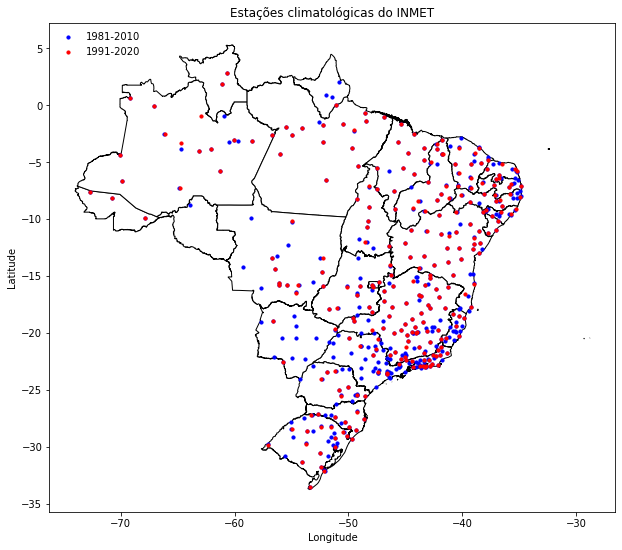

In [356]:
world = gpd.read_file('../dados/shapefile/Brasil_estados/BRUFE250GC_SIR.shp')

ax = world.plot(color='white', figsize=(12,9), edgecolor='black')

gdf2.plot(ax=ax, color='blue', markersize=10, label='1981-2010')
gdf3.plot(ax=ax, color='red', markersize=10, label='1991-2020')

plt.title('Estações climatológicas do INMET')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.legend(loc="upper left", frameon=False)

plt.show()

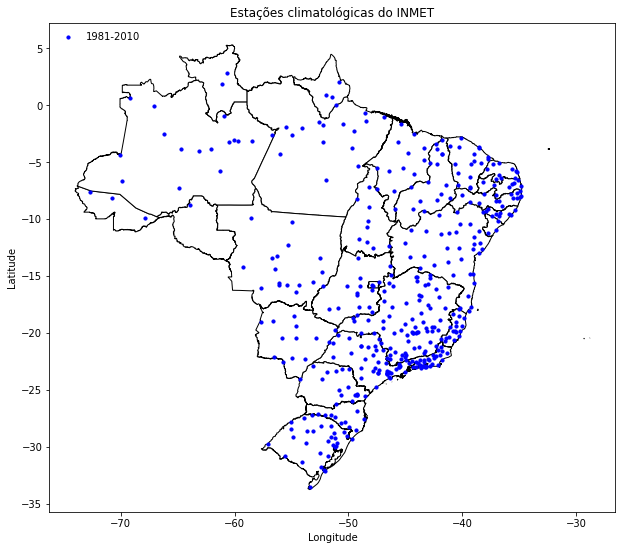

In [357]:
world = gpd.read_file('../dados/shapefile/Brasil_estados/BRUFE250GC_SIR.shp')

ax = world.plot(color='white', figsize=(12,9), edgecolor='black')

gdf2.plot(ax=ax, color='blue', markersize=10, label='1981-2010')

plt.title('Estações climatológicas do INMET')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.legend(loc="upper left", frameon=False)

plt.show()

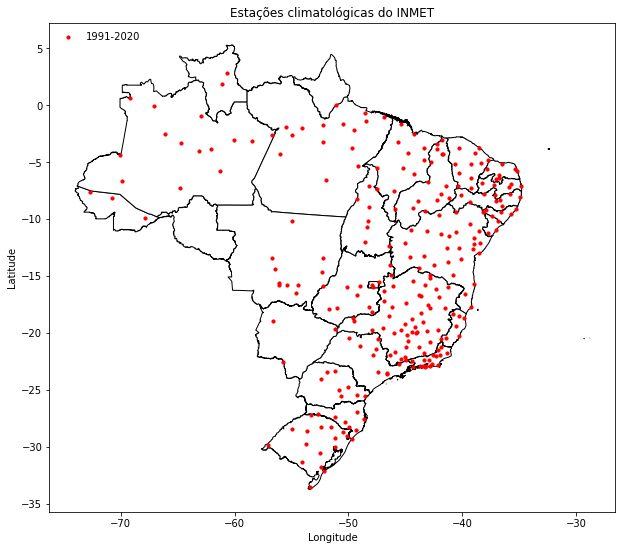

In [358]:
world = gpd.read_file('../dados/shapefile/Brasil_estados/BRUFE250GC_SIR.shp')

ax = world.plot(color='white', figsize=(12,9), edgecolor='black')

gdf3.plot(ax=ax, color='red', markersize=10, label='1991-2020')

plt.title('Estações climatológicas do INMET')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.legend(loc="upper left", frameon=False)

plt.show()

## Geração do gráfico 2

Plotagem considerando a situação da estação, isto é, **Operante, Desativada e Fechada**.

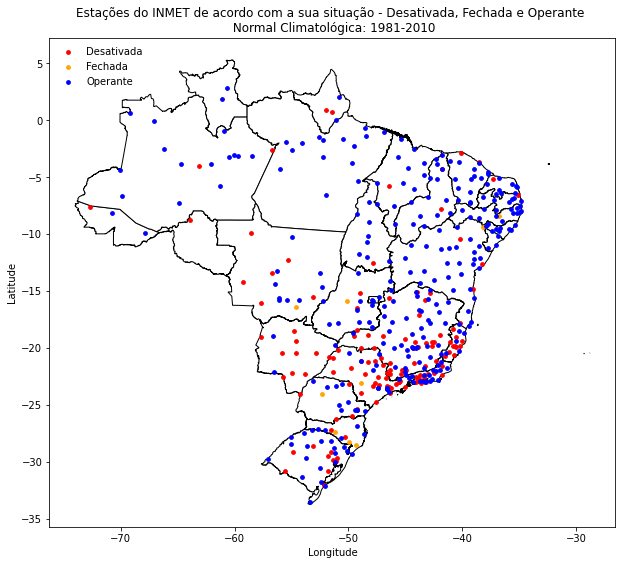

In [359]:
world = gpd.read_file('../dados/shapefile/Brasil_estados/BRUFE250GC_SIR.shp')

ax = world.plot(figsize=(12,9), color='white', edgecolor='black')

gdf2[gdf2['Situação'] == 'Desativada'].plot(ax=ax, color='red', label='Desativada', markersize=14)
gdf2[gdf2['Situação'] == 'Fechada'].plot(ax=ax, color='orange', label='Fechada', markersize=14)
gdf2[gdf2['Situação'] == 'Operante'].plot(ax=ax, color='blue', label='Operante', markersize=14)

plt.title('Estações do INMET de acordo com a sua situação - Desativada, Fechada e Operante \n Normal Climatológica: 1981-2010')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.legend(loc="upper left", frameon=False)

plt.show()

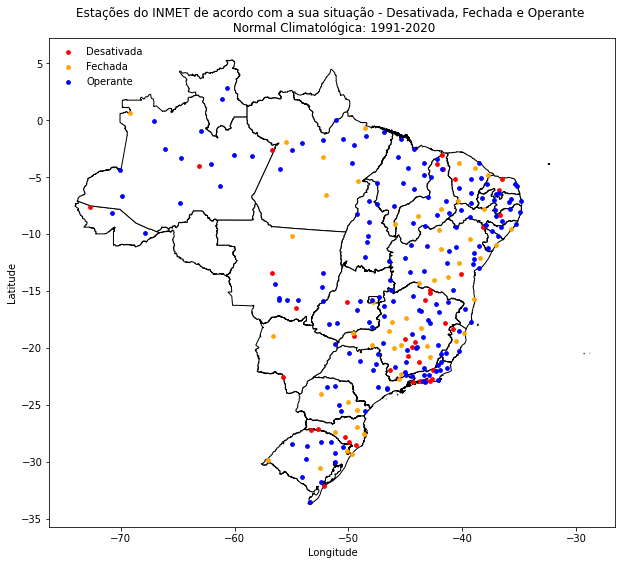

In [360]:
world = gpd.read_file('../dados/shapefile/Brasil_estados/BRUFE250GC_SIR.shp')

ax = world.plot(figsize=(12,9), color='white', edgecolor='black')

gdf3[gdf3['Situação'] == 'Desativada'].plot(ax=ax, color='red', label='Desativada', markersize=14)
gdf3[gdf3['Situação'] == 'Fechada'].plot(ax=ax, color='orange', label='Fechada', markersize=14)
gdf3[gdf3['Situação'] == 'Operante'].plot(ax=ax, color='blue', label='Operante', markersize=14)

plt.title('Estações do INMET de acordo com a sua situação - Desativada, Fechada e Operante \n Normal Climatológica: 1991-2020')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.legend(loc="upper left", frameon=False)

plt.show()